# 27 September 2021

## **Latihan Data Preparation**

Pada latihan kali ini, kita akan menggunakan beberapa metode yang telah kita pelajari:

- Imputing missing value
- Encoding
- Scaling
- Regularization
<br><br>

### **Gunakan melb_data.csv (Melbourne House Data) dengan:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

### **Yang dilakukan pada preprocessing dan modeling:**
- Lakukan EDA secara sederhana untuk eksplorasi dataset.
- Gunakan ColumnTransformer untuk imputasi missing value dan encoding.
- Ada 4 features yang mengandung missing value. Isi missing value tersebut dengan imputer yang sesuai dengan karakter masing-masing feature.
- Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Scaling numerical features. Pilih scaler yang menurut kamu paling cocok berdasarkan karakteristik datanya.
- Lakukan prediksi dengan metode Lasso pada data preprocessed dengan proporsi 80:20 dan random_state = 42. Interpretasikan hasilnya!


## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Load & Explore Dataset**

In [2]:
df = pd.read_csv('melb_data.csv')
df.iloc[:, 0:10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0
...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0


In [3]:
df.iloc[:5, 10:21]

,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df = df[['Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize',
            'BuildingArea','YearBuilt','CouncilArea','Regionname','Price']]

In [5]:
df.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,1.358000e+04
mean,2.937997,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,1.075684e+06
std,0.955748,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,8.500000e+04
25%,2.000000,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,6.500000e+05
50%,3.000000,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,9.030000e+05
75%,3.000000,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,1.330000e+06
max,10.000000,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,9.000000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        13580 non-null  object 
 1   Rooms         13580 non-null  int64  
 2   Type          13580 non-null  object 
 3   Method        13580 non-null  object 
 4   Distance      13580 non-null  float64
 5   Bedroom2      13580 non-null  float64
 6   Bathroom      13580 non-null  float64
 7   Car           13518 non-null  float64
 8   Landsize      13580 non-null  float64
 9   BuildingArea  7130 non-null   float64
 10  YearBuilt     8205 non-null   float64
 11  CouncilArea   12211 non-null  object 
 12  Regionname    13580 non-null  object 
 13  Price         13580 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.5+ MB


In [8]:
df.select_dtypes('object')

,Suburb,Type,Method,CouncilArea,Regionname
0,Abbotsford,h,S,Yarra,Northern Metropolitan
1,Abbotsford,h,S,Yarra,Northern Metropolitan
2,Abbotsford,h,SP,Yarra,Northern Metropolitan
3,Abbotsford,h,PI,Yarra,Northern Metropolitan
4,Abbotsford,h,VB,Yarra,Northern Metropolitan
...,...,...,...,...,...
13575,Wheelers Hill,h,S,NaN,South-Eastern Metropolitan
13576,Williamstown,h,SP,NaN,Western Metropolitan
13577,Williamstown,h,S,NaN,Western Metropolitan
13578,Williamstown,h,PI,NaN,Western Metropolitan


### **Simple EDA**

In [9]:
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (feature not in ['Suburb']))]
cat_features

['Type', 'Method', 'CouncilArea', 'Regionname']

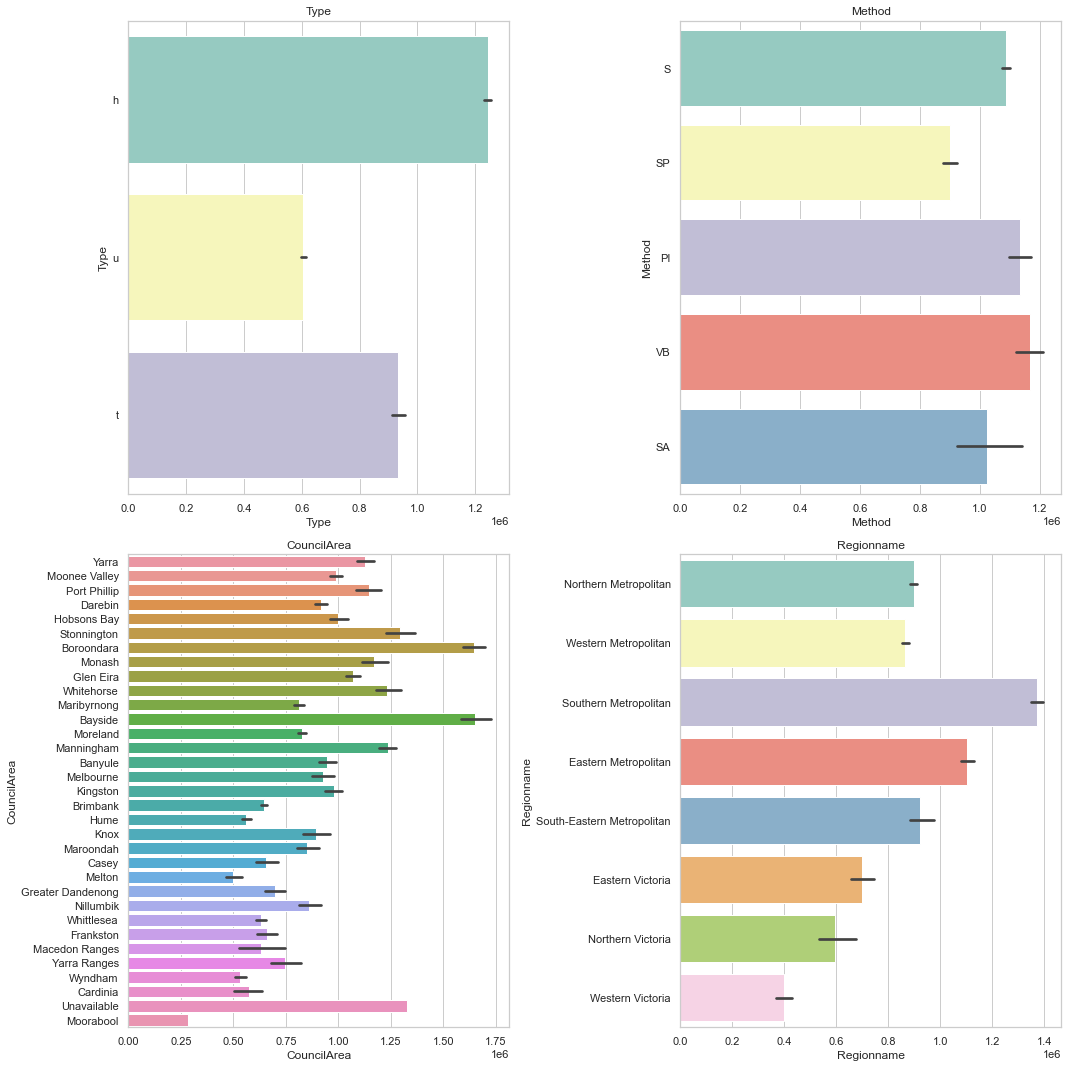

In [37]:
plt.figure(figsize=(15, 15), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in cat_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.barplot(x = 'Price', y = feature, data = df)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout();

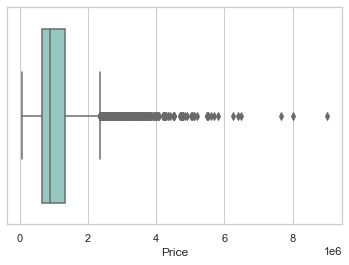

In [11]:
sns.boxplot(x='Price', data=df);

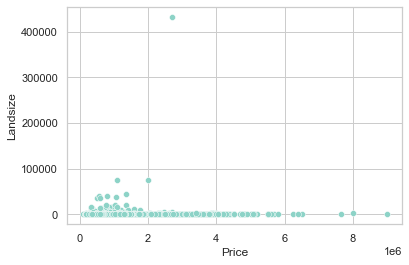

In [12]:
sns.scatterplot(x='Price', y='Landsize', data=df);

In [43]:
df[df['Landsize'] > 400000]

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
11020,Fitzroy,3,h,VB,2.1,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra,Northern Metropolitan,2700000.0


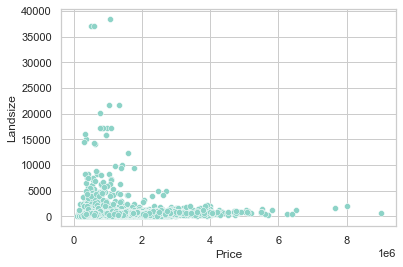

In [14]:
sns.scatterplot(x='Price', y='Landsize', data=df[df['Landsize'] < 40000]);

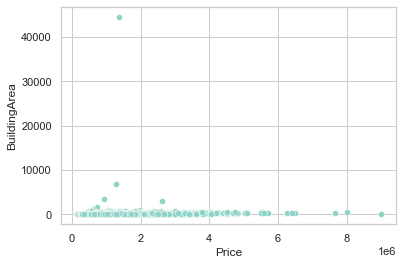

In [15]:
sns.scatterplot(x='Price', y='BuildingArea', data=df);

In [16]:
df[df['BuildingArea'] > 40000]

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
13245,New Gisborne,5,h,S,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,Northern Victoria,1355000.0


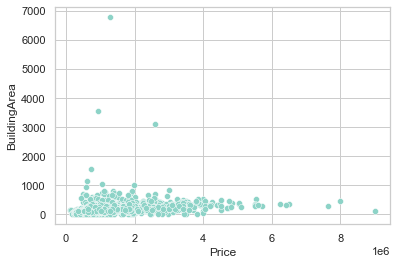

In [17]:
sns.scatterplot(x='Price', y='BuildingArea', data=df[df['BuildingArea'] < 40000]);

In [18]:
df.isna().sum()

Suburb             0
Rooms              0
Type               0
Method             0
Distance           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Regionname         0
Price              0
dtype: int64

In [19]:
# Check correlation to the target
df.corr()['Price']

Rooms           0.496634
Distance       -0.162522
Bedroom2        0.475951
Bathroom        0.467038
Car             0.238979
Landsize        0.037507
BuildingArea    0.090981
YearBuilt      -0.323617
Price           1.000000
Name: Price, dtype: float64

## **Data Pre-processing**

Isi missing value pada feature 'Car','BuildingArea','YearBuilt','CouncilArea'
>- SimpleImputer: most_frequent untuk 'CouncilArea'
>- Iterative imputer: 'Car','BuildingArea','YearBuilt'

Encoding:
>- binary : 'Suburb', 'CouncilArea', 'Regionname'
>- onehot : 'Type', 'Method'

Scaling:
>- RobustScaler() karena terdapat banyak outliers

In [20]:
# Import Libraries
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer # untuk transformers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce # untuk ordinal dan binary encoder
from sklearn.preprocessing import RobustScaler

In [21]:
# Binary & Simple imputer (mode)
binary_simple = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

# Encoding
transformer = ColumnTransformer([
    ('imputer', IterativeImputer(), ['Car','BuildingArea','YearBuilt']),
    ('onehot', OneHotEncoder(drop='first'), ['Type','Method']),
    ('binary', ce.BinaryEncoder(), ['Suburb','Regionname']),
    ('binary_simple', binary_simple, ['CouncilArea'])
], remainder='passthrough')

## **Data Splitting**

In [22]:
# Define X and y
X = df.drop(columns='Price')
y = df['Price']

In [23]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42
)

## **Data Transform**

In [24]:
X_train.head()

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
12796,Mount Waverley,4,h,S,14.2,4.0,2.0,2.0,695.0,160.0,1970.0,NaN,Eastern Metropolitan
9642,Mount Waverley,3,h,S,14.2,3.0,1.0,2.0,810.0,NaN,NaN,Monash,Eastern Metropolitan
3207,Hawthorn,2,u,S,4.6,2.0,1.0,1.0,82.0,NaN,NaN,Boroondara,Southern Metropolitan
1698,Carlton North,2,u,S,3.2,2.0,1.0,1.0,0.0,76.0,1975.0,Yarra,Northern Metropolitan
761,Bentleigh,4,h,S,13.0,4.0,2.0,1.0,292.0,NaN,NaN,Glen Eira,Southern Metropolitan


In [25]:
X_train_preprocessed = transformer.fit_transform(X_train) # .fit and .transform method
X_test_preprocessed = transformer.transform(X_test) #.transform method

## **Scaling**

In [26]:
# Scaling
scaler = RobustScaler()

scaler.fit(X_train_preprocessed)

X_train_preprocessed_scaled = scaler.transform(X_train_preprocessed)
X_test_preprocessed_scaled = scaler.transform(X_test_preprocessed)

## **Find the best alpha**


In [27]:
# Import Libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [39]:
# Lasso

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0000001]
testing_rmse = []
training_rmse = []
score = 0

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_preprocessed_scaled, y_train)
    
    y_predict_train = lasso.predict(X_train_preprocessed_scaled)
    training_rmse.append(mean_squared_error(y_train, y_predict_train)**0.5)
    
    y_predict_test = lasso.predict(X_test_preprocessed_scaled)
    rmse_score = mean_squared_error(y_test, y_predict_test)**0.5
    testing_rmse.append(rmse_score)
    
    if i==0:
        score = rmse_score
        best_alpha = alpha[i]
        
    if score > rmse_score:
        score = rmse_score
        best_alpha = alpha[i]

In [40]:
print('Best alpha', best_alpha)
print('RMSE', score)

print('Training RMSE:', training_rmse)
print('Testing RMSE:', testing_rmse)


Best alpha 1e-07
RMSE 394649.26952518546
Training RMSE: [538201.9254632682, 422812.49796398636, 412140.4171691664, 411694.2107798628, 411630.86777626205, 411630.0851897478, 411630.0773639261, 411630.0772856677, 411630.0772848851, 411630.0772848772]
Testing RMSE: [522790.6010369605, 406052.4593856037, 395440.6536126492, 394714.3086602397, 394654.27067582787, 394649.75477170874, 394649.3179060811, 394649.2743621484, 394649.27000873873, 394649.26952518546]


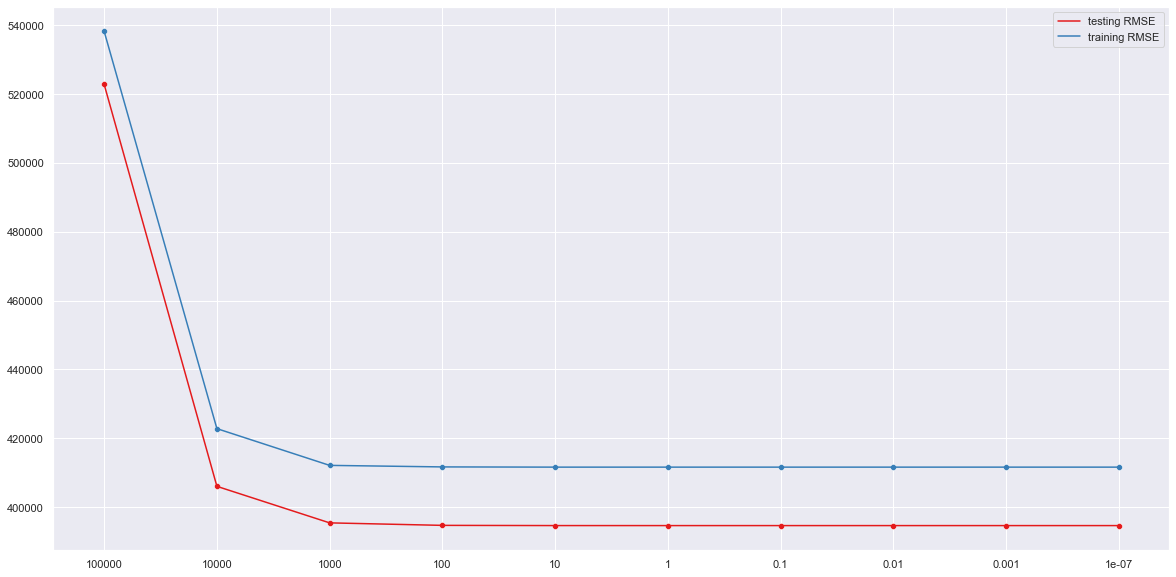

In [44]:
# Plot the alphas
sns.set(palette='Set1')
length = range(len(alpha))

plt.figure(figsize = (20,10))

sns.lineplot(length, testing_rmse)
sns.scatterplot(length, testing_rmse)

sns.lineplot(length,training_rmse)
sns.scatterplot(length, training_rmse)

plt.legend(['testing RMSE', 'training RMSE'])
plt.xticks(length, alpha);

In [42]:
pd.DataFrame(
    {
        'alpha': alpha,
        'train RMSE': training_rmse,
        'test RMSE': testing_rmse
    }
)

,alpha,train RMSE,test RMSE
0,1.000000e+05,538201.925463,522790.601037
1,1.000000e+04,422812.497964,406052.459386
2,1.000000e+03,412140.417169,395440.653613
3,1.000000e+02,411694.210780,394714.308660
4,1.000000e+01,411630.867776,394654.270676
5,1.000000e+00,411630.085190,394649.754772
6,1.000000e-01,411630.077364,394649.317906
7,1.000000e-02,411630.077286,394649.274362
8,1.000000e-03,411630.077285,394649.270009
9,1.000000e-07,411630.077285,394649.269525


### **Interpretasi**

Dari alpha 100 ke 1, nilai RMSE untuk train dan test set sudah tidak terlalu berubah signifikan. Jadi, untuk kasus kali ini digunakan alpha = 1 saja.

Awalnya kita memiliki 13 variabel independen. Namun, setelah hasil encoding, jumlah feature menjadi 35.

In [32]:
# Lasso coefs
pd.DataFrame({'Coef':lasso.coef_})

,Coef
0,45973.563660
1,-9831.031389
2,-30782.650400
3,-284155.394279
4,-487145.229865
5,76721.069377
6,47401.803303
7,37750.911706
8,42586.512600
9,0.000000


### **Interpretasi**

Feature awal yang digunakan berjumlah 13. Namun, proses encoding menghasilkan penambahan feature menjadi 35 features. 2 dari feature tersebut memiliki nilai koefisien 0 setelah dikenakan penalti oleh Lasso yang menggunakan alpha = 1.

## **Modelling**

In [33]:
# Model
model = Lasso(alpha=1)

# Model training
model.fit(X_train_preprocessed_scaled, y_train)

# Model predicting test set  
y_pred = model.predict(X_test_preprocessed_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 155748428941.36984
RMSE: 394649.75477170874


## **Modelling with Pipeline**

Melakukan tahap transform, scaling, dan modeling dalam 1 tahap.

In [34]:
# Model Lasso regression
lasso = Lasso(alpha=1)

# Coba model dengan scaling
model = Pipeline([
    ('transformer', transformer),
    ('scaling', RobustScaler()),
    ('model', lasso)
])

# Fit
model.fit(X_train, y_train)

# Predict 
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE', mse)
print('RMSE', rmse)

MSE 155748428941.36984
RMSE 394649.75477170874


### **Actual & prediction value comparison**

In [35]:
y_test = y_test.astype('int')
y_pred = y_pred.astype('int')


In [36]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

,y_test,y_pred
1061,2600000,1687847
6482,620000,504539
8395,1000000,1016646
4659,430000,745686
7386,392250,669726
...,...,...
10455,1415000,876956
3616,6500000,3376955
577,2450000,1974404
12620,1155000,1944359


### **Interpretasi**

Pemodelan Lasso regression dengan menggunakan dan tanpa pipeline menghasilkan nilai RMSE yang sama, yaitu 394649.75. Namun, untuk ke depannya, biasakan melakukan pemodelan dengan menggunakan pipeline untuk menghindari terjadinya information leakage (data test ikut dipelajari oleh model).